<a href="https://colab.research.google.com/github/Biswojit1821/OUR-COUNT-DOWN-FOR-ZOOKS/blob/main/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import models

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from keras.applications.vgg16 import VGG16
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')

#LOAD DATASET

In [168]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#DATASET SHAPE 

In [169]:
X_train.shape


(50000, 32, 32, 3)

In [170]:
X_test.shape


(10000, 32, 32, 3)

In [171]:
y_train.shape


(50000, 1)

In [172]:
y_test.shape

(10000, 1)

#Classes

In [173]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

#VISUALIZE THE DATA

In [174]:
def get_ten_random_images():
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

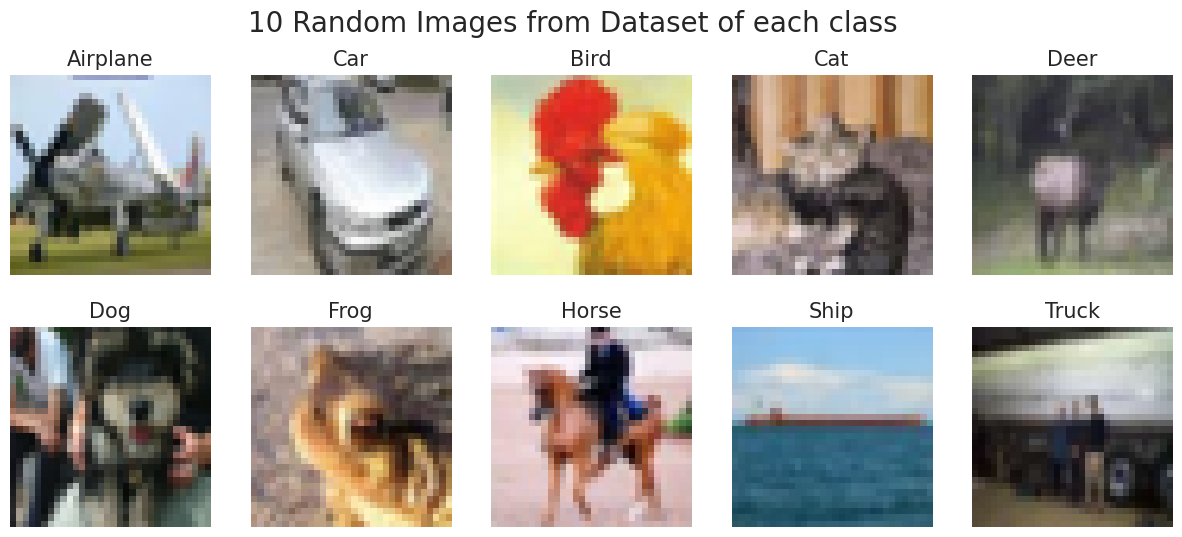

In [175]:
d = get_ten_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('FIRST 10 IMAGES FROM EACH CLASS', fontsize = 20)
plt.show()

#RESHAPE OF DATA

In [176]:
import keras
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

In [177]:
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [178]:
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [179]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [180]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.7))


model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))
    

In [181]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_97 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_88 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_100 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 activation_98 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_89 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                    

#Build model

In [182]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

#compiling the model

In [203]:
epochs_hist = model.fit(X_train, y_train_cat, batch_size=128, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
313/313 [==============================] - 12s 39ms/step - loss: 0.4508 - accuracy: 0.9323 - val_loss: 0.8322 - val_accuracy: 0.8381
Epoch 2/50
313/313 [==============================] - 12s 38ms/step - loss: 0.4985 - accuracy: 0.9220 - val_loss: 0.7449 - val_accuracy: 0.8490
Epoch 3/50
313/313 [==============================] - 11s 35ms/step - loss: 0.5175 - accuracy: 0.9238 - val_loss: 0.8015 - val_accuracy: 0.8437
Epoch 4/50
313/313 [==============================] - 11s 36ms/step - loss: 0.5240 - accuracy: 0.9215 - val_loss: 0.8138 - val_accuracy: 0.8421
Epoch 5/50
313/313 [==============================] - 12s 37ms/step - loss: 0.5427 - accuracy: 0.9190 - val_loss: 0.7473 - val_accuracy: 0.8606
Epoch 6/50
313/313 [==============================] - 11s 35ms/step - loss: 0.5425 - accuracy: 0.9226 - val_loss: 0.7550 - val_accuracy: 0.8613
Epoch 7/50
313/313 [==============================] - 11s 35ms/step - loss: 0.5479 - accuracy: 0.9215 - val_loss: 0.7872 - val_accuracy:

#PLOT

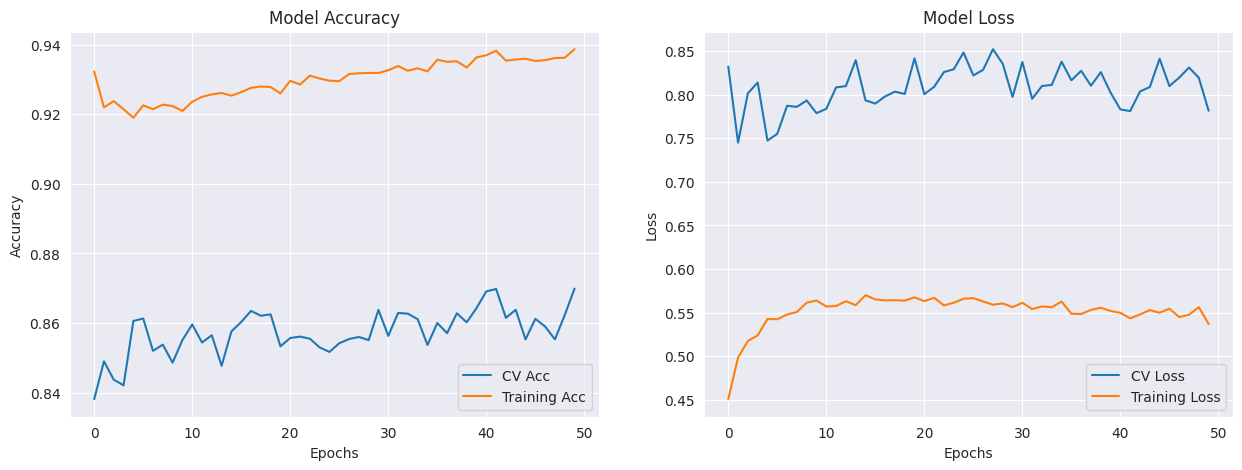

In [204]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

#predict

In [205]:
score = model.evaluate(X_test, y_test_cat, batch_size=1024, verbose=1)

10/10 [==============================] - 1s 55ms/step - loss: 0.8021 - accuracy: 0.8667


In [206]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 86.67%


In [207]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(x[index])
  plt.xlabel(data_dict[y[index]])

In [208]:
y_test=y_test.reshape(-1,)

In [209]:
y_pred=model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [210]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:20]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]

In [211]:
y_test[:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
      dtype=uint8)

#TEST BY GIVING INPUT

In [226]:
n=int(input("number of times you want to check prediction :"))

number of times you want to check prediction :2


Enter the index:2


Ship
Enter the index:4


Frog


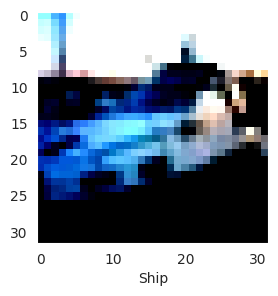

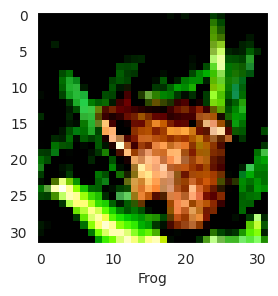

In [227]:
import time
while n!=0:
  ind=int(input("Enter the index:"))
  plot_sample(X_test,y_test,ind)
  
  print(data_dict[y_classes[ind]])
  time.sleep(3)
  n=n-1